<a href="https://colab.research.google.com/github/rpn1966/LaneEmden/blob/main/LaneEmdenWidget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rpn1966/LaneEmden.git

Cloning into 'LaneEmden'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [1]:
#!pip install mpld3
import numpy as np
import matplotlib.pyplot as plt
#import mpld3
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display, Markdown, Latex, Math
#mpld3.enable_notebook()

In [2]:
def plotter(x,y,n):
  fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,3.5))
  axes[0].plot(x,y**n,'b-')
  axes[0].set_title(r'$\theta^n$ versus $\xi$')
  axes[0].set_xlabel(r'$\xi$')
  axes[0].set_ylabel(r'$\theta^n$')
  axes[1].plot(x,y**(n+1),'r-')
  axes[1].set_title(r'$\theta^{(n+1)}$ versus $\xi$')
  axes[1].set_xlabel(r'$\xi$')
  axes[1].set_ylabel(r'$\theta^{(n+1)}$')
  axes[2].plot(x,y,'g-')
  axes[2].set_title(r'$\theta$ versus $\xi$')
  axes[2].set_xlabel(r'$\xi$')
  axes[2].set_ylabel(r'$\theta$')
  fig.tight_layout()
  #plt.plot(x,y,'b')
  #plt.title(r'$\theta$ versus $\xi$')
  #plt.xlabel(r'$\xi$')
  #plt.ylabel(r'$\theta$')

In [3]:
def plotter2(r,rho,P,T,L):
  fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(14,3.5))
  axes[0].plot(r,rho,'b-')
  axes[0].set_title(r'$\rho$ versus $r$')
  axes[0].set_xlabel(r'$r$')
  axes[0].set_ylabel(r'$\rho$')
  axes[1].plot(r,P,'r-')
  axes[1].set_title(r'$P$ versus $r$')
  axes[1].set_xlabel(r'$r$')
  axes[1].set_ylabel(r'$P$')
  axes[2].plot(r,T,'g-')
  axes[2].set_title(r'$T$ versus $r$')
  axes[2].set_xlabel(r'$r$')
  axes[2].set_ylabel(r'$T$')
  axes[3].plot(r,L,'k-')
  axes[3].set_title(r'$L$ versus $r$')
  axes[3].set_xlabel(r'$r$')
  axes[3].set_ylabel(r'$L$')
  fig.tight_layout()

In [4]:
@widgets.interact_manual(n=[0,1.,1.5,2.,3.,3.3,4.,5.],Mstar=[0.1,0.5,1.0,2.0,5.0],Rstar=[0.1,0.5,1.0,2.0,5.0])
def lane_emden(n,Mstar,Rstar):
  # Define physical constants required to define the stellar models
  Pi=np.pi
  G=6.67E-11
  k_B=1.38E-23
  m_H=1.67E-27
  mu=0.62
  
  # Solar values
  Msun=1.989E30
  Rsun=7.E8
  Lsun2=3.86E26

  #Energy generation rate for PP-chain
  Epp0=2.6E-37
  
  # Define maximum number of integration points
  Nmax=1000000
  
  # Ask the user to input the polytropic index, n
  #n=float(input('Enter n, the polytrope index '))
  
  # Ask the user to input physical parameters of the star
  #Rstar=float(input('Enter Rstar, the radius of the star in units of the Solar radius '))
  #Mstar=float(input('Enter Mstar, the mass of the star in units of the Solar mass '))
  Rstar=Rstar*Rsun     # Convert radius to physical units
  Mstar=Mstar*Msun     # Convert mass to physical units
  
  # The variables are as follows 
  # Dimensionless length : xi 
  # Dimensionless density function : theta
  # The gradient of theta wrt xi : dtheta_dxi
  
  # Here we define floating point arrays for xi, theta, dtheta_dxi:
  xi=np.zeros(Nmax,dtype=np.float64)
  theta=np.zeros(Nmax,dtype=np.float64)
  dtheta_dxi=np.zeros(Nmax,dtype=np.float64)
  
  # Specify boundary conditions, and start the integration a small distance (1.E-6) 
  # away from the centre of the star (remember that starting at exactly xi=0.0 is not 
  # possible since the equations diverge there through division by zero.
  theta[0]=1.0
  dtheta_dxi[0]=0.0
  xi[0]=1.E-6
  
  # The step size in radius is defined by dxi.
  # The smaller the step the more accurate the calculation.
  # And the longer it takes!
  dxi = 1.E-3
  
  # We now define a variable, i, that counts the number of steps as we move out 
  # through the star. We cycle around a loop, computing the values at each 
  # radius point in the star until the value of theta becomes negative, 
  # (or until we iterate through the maximum number of grid points allowed by Nmax), 
  # at which point the integration ends and we jump out of the loop.
  
  i=0    # Note that i=0 corresponds to the radius point at the centre of the star

  while theta[i] > 0 and i < Nmax-1:    
    i=i+1   # Increment i during each iteration of the loop
    
    # Calculate the next value of dtheta_dxi at radius point i using data from i-1
    dtheta_dxi[i]=dtheta_dxi[i-1] - ( 2.0*dtheta_dxi[i-1]/xi[i-1] + theta[i-1]**n )*dxi
    
    # Calculate the next value of theta[i] using the updated value of dtheta_dxi[i]
    theta[i] = theta[i-1] + dtheta_dxi[i]*dxi 
    
    # Increment the dimensionless radius (move out to the next radius point in the star).
    xi[i] = xi[i-1] + dxi
    
    # Save the final positive value of theta and its gradient for determining the
    # value of xi where theta=0
    thetalast = theta[i-1]
    dtheta_dxilast = dtheta_dxi[i-1]
  
  # Note we are now out of the loop as we have changed the indentation!
  
  # We calculate the position of the root (xi=xi_1), using the last
  # value of theta to be computed (which  is the first value < 0, and the  
  # previous theta value (stored as thetalast) which is the last value > 0.
  # To find xi_1 we interpolate between the last positive value and first 
  # negative value of theta to estimate the location where theta=0.
  # We do the same for dtheta_dxi to find the value of the gradient
  # at the location xi=xi_1.
  xi_1 = xi[i] + (theta[i]/(thetalast-theta[i]))*dxi
  dtheta_dxi_1 = dtheta_dxi[i] - (xi[i]-xi_1)*(dtheta_dxi[i]-dtheta_dxilast)/dxi
  
  
  print('')
  print ('The value of xi_1 = ',xi_1) 
  print ('The value of (dtheta/dxi)_1 = ',dtheta_dxi_1)
  print('')
  plotter(xi[0:i-1],theta[0:i-1],n)
  
  
  a_n = -xi_1/3.*1.0/dtheta_dxi_1
  b_n = 1.0/((n+1)*xi_1*(-dtheta_dxi_1))
  c_n = 1.0/(4*Pi*(n+1.)*(-dtheta_dxi_1)**2)
  rho_c = a_n*3.0*Mstar/(4.*Pi*Rstar**3)
  T_c = b_n*G*Mstar*mu*m_H/(Rstar*k_B)
  P_c = c_n*G*Mstar**2/Rstar**4

  # We need to know the value of K, the polytropic constant, 
  # to convert values of the variable xi to radius values in
  # physical units since r=alpha*xi, and alpha depends on K
  K = (4.*Pi)**(1./n)*G/(n+1)*xi_1**(-(n+1.)/n)*(-dtheta_dxi_1)**((1.-n)/n)*Mstar**((n-1.)/n)*Rstar**((3.-n)/n)
  
  # Now calculate how density, pressure, temperature, luminosity
  # vary with radius
  Lsum=np.zeros(i-1)
  alpha=np.sqrt((n+1.)*K*rho_c**(1./n-1.)/(4.0*Pi*G))
  dr=dxi*alpha
  r=alpha*xi[0:i-1]
  rho=rho_c*theta[0:i-1]**n
  Pres=P_c*theta[0:i-1]**(n+1.)
  Temp=T_c*theta[0:i-1]
  # Each shell generates a local contribution to the luminosity from PP-chain
  L=4.*Pi*r**2*dr*Epp0*rho**2*Temp**4.
  # Sum the luminosities from all shells to get total luminosity
  Lsum[0]=4.*Pi/3.*r[0]**3*Epp0*rho[0]**2*Temp[0]**4
  for j in range(1,i-1):
    Lsum[j]=L[j]+Lsum[j-1]
  
  plotter2(r,rho,Pres,Temp,Lsum)


  #plt.plot(xi[0:i-1],theta[0:i-1],'b-')
  #plt.title(r'$\theta$ versus $\xi$')
  #print('')
  #display(Latex(r'\mathrm{\mathbf{The \, value \, of} \, \xi_1 \, \mathbf{is:}}'), xi_1)
  #print('')
  #display(Latex(r'\mathrm{\mathbf{The \, value \, of} \, \left(\frac{d\theta}{d \xi}\right)_{\xi_1} \, \mathbf{is:}}'),dtheta_dxi_1)



interactive(children=(Dropdown(description='n', options=(0, 1.0, 1.5, 2.0, 3.0, 3.3, 4.0, 5.0), value=0), Drop…

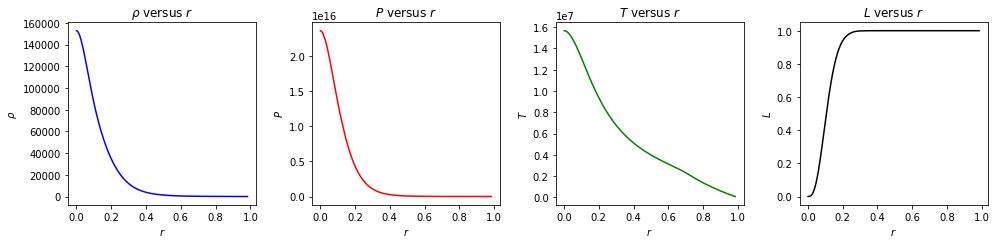

In [5]:
Ms,Rs,Ts,rhos,Ps,Ls,XH,YHe,YHe3,ZC12,ZN14,ZO16=np.loadtxt('LaneEmden/bs05op.dat',skiprows=24,unpack=True)
rhos=rhos*1000.
Ps=Ps/10.
plotter2(Rs,rhos,Ps,Ts,Ls)

In [18]:
print(Ms)

[5.000000e-07 6.000000e-07 7.000000e-07 ... 9.999888e-01 9.999892e-01
 9.999897e-01]
